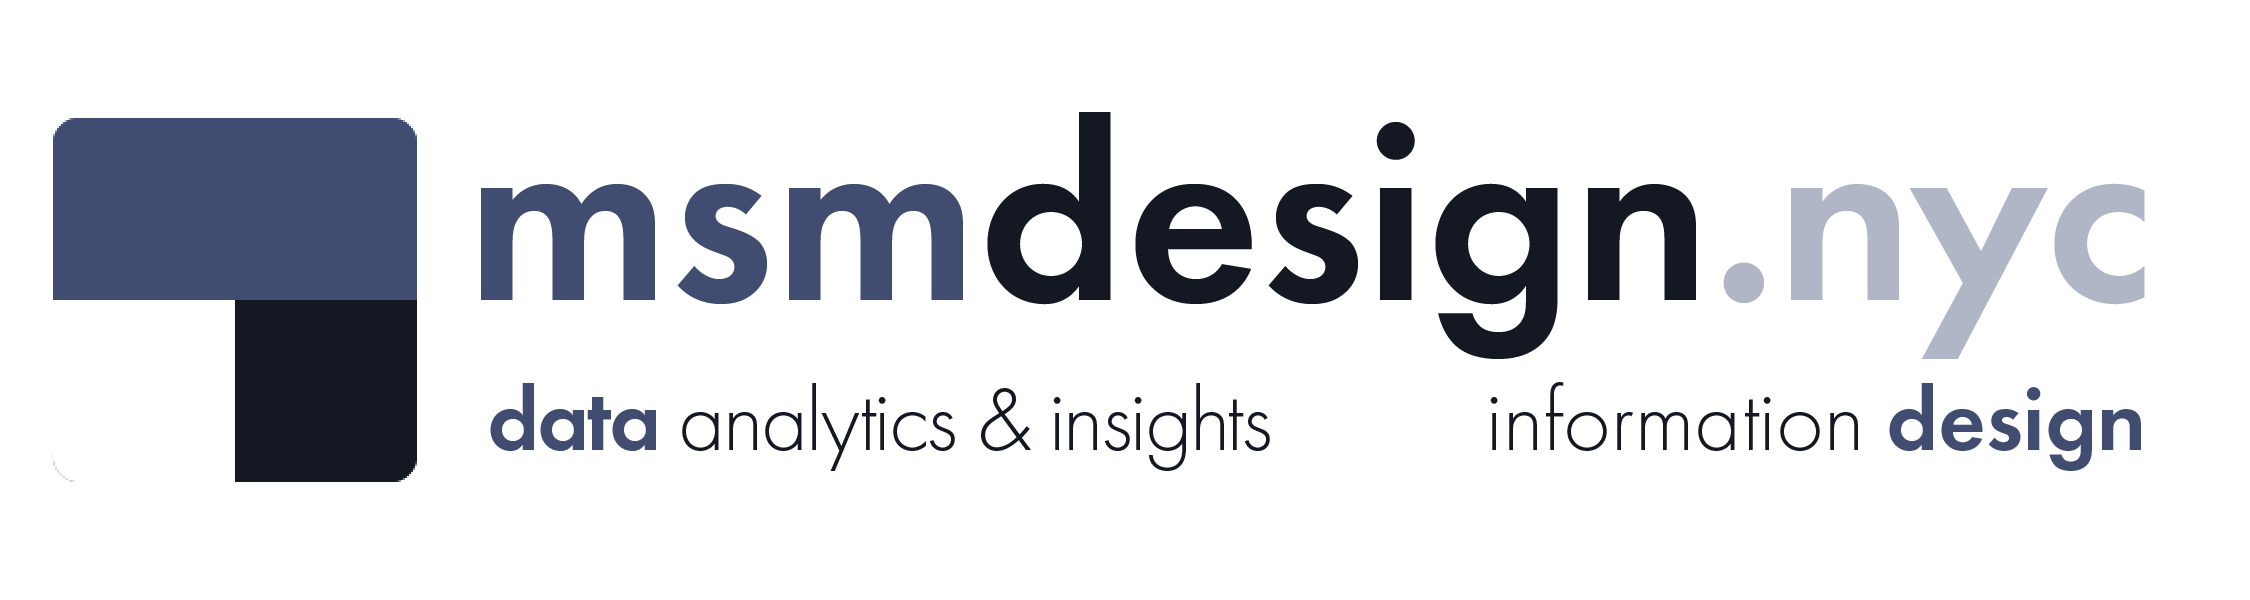

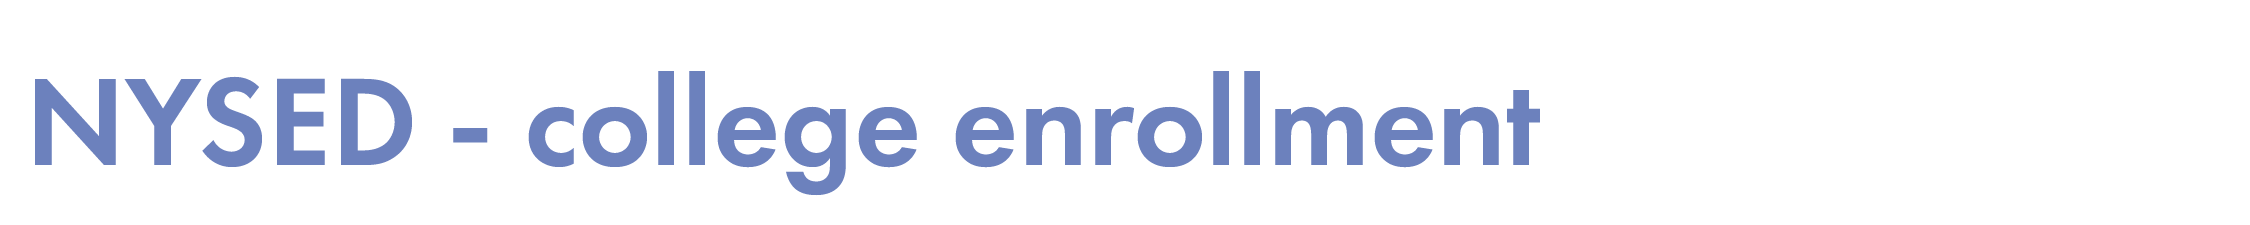

# Exploratory Data Analysis

**Catalogue Number:** MSM-E35

**Author:** David White

**Contact:** david@msmdesign.nyc | [msmdesign.nyc](https://msmdesign.nyc/)

**Acknowledgements:** New York State Education Department (NYSED) [http://www.nysed.gov].

**Language:** Python

**Libraries Used:** NumPy, pandas, matplotlib, seaborn 

**Publication Date:** Monday, March 8, 2021

> ### What is Exploratory Data Analysis?
> **Exploratory data analysis (EDA)** is a technique used by data scientists to inspect, characterize and briefly summarize the contents of a dataset. EDA is often the first step when encountering a new or unfamiliar dataset. EDA helps the data scientist become acquainted with a dataset and test some basic assumptions about the data. By the end of the EDA process, some initial insights can be drawn from the dataset and a framework for further analysis or modeling is established.


## 0. About this Dataset

**Data Source: New York State Education Department (NYSED)** 

"Fall Degree-Credit Enrollment" This report includes fall degree credit enrollment counts reported by institutions of higher education in New York State.  These data are broken out by year (back to 2010), County, Public and Private Institutions, Sector (SUNY, CUNY, Independent, Proprietary and Public-Special), 2-Year and 4-Year/Grad level, Full-Time and Part-Time status as well as undergraduates (both matriculated and non-matriculated), first-professionals, graduates, all students, first-time enrollees and Full-Time equivalents (FTE). [http://www.nysed.gov/information-reporting-services/higher-education-reports].

## 1. Prepare the Workspace

In [1]:
# load the libraries needed for data analysis and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset from a csv file

df = pd.read_csv('https://raw.githubusercontent.com/davidwhitemsm/selected-open-datasources/master/MSM-DS33-enrollment-2010-current_.csv', encoding='utf-8')

In [3]:
# glimpse the dataset

df.head(10)

,YEAR,COUNTY_CODE,COUNTY_NAME,SECTOR_CODE,SECTOR,SCHOOL_TYPE_CODE,SCHOOL_TYPE,SCHOOL_LEVEL_CODE,SCHOOL_LEVEL,SEDCODE,INST_ID,LEGAL_NAME,UNDERGRADUATE_FULLTIME_TOTAL,UNDERGRADUATE_FT_ENR_PROGRAM,UNDERGRADUATE_FT_NOT_ENR_PROGRAM,UNDERGRADUATE_PARTTIME,UNDERGRADUATE_PT_ENR_PROGRAM,UNDERGRADUATE_PT_NOT_ENR_PROGRAM,FIRST_PROFESSIONAL_FULLTIME,FIRST_PROFESSIONAL_PARTTIME,GRADUATE_FULLTIME,GRADUATE_PARTTIME,ALL_STUDENTS_FULLTIME,ALL_STUDENTS_PARTTIME,FIRST_TIME_FULLTIME,FIRST_TIME_PARTTIME,TOTAL,FTE
0,2012,1,ALBANY,4,PUBLIC - SPECIAL,0,PUBLIC,1,4-Year/Grad,110000,800000070361,NYSDOH WADSWORTH CENTER FOR LABORATORIES & RSRC,0,0,0,0,0,0,0,0,4,0,4,0,0,0,4,4.00
1,2013,1,ALBANY,4,PUBLIC - SPECIAL,0,PUBLIC,1,4-Year/Grad,110000,800000070361,NYSDOH WADSWORTH CENTER FOR LABORATORIES & RSRC,0,0,0,0,0,0,0,0,5,0,5,0,0,0,5,5.00
2,2014,1,ALBANY,4,PUBLIC - SPECIAL,0,PUBLIC,1,4-Year/Grad,110000,800000070361,NYSDOH WADSWORTH CENTER FOR LABORATORIES & RSRC,0,0,0,0,0,0,0,0,8,0,8,0,0,0,8,8.00
3,2015,1,ALBANY,4,PUBLIC - SPECIAL,0,PUBLIC,1,4-Year/Grad,110000,800000070361,NYSDOH WADSWORTH CENTER FOR LABORATORIES & RSRC,0,0,0,0,0,0,0,0,5,0,5,0,0,0,5,5.00
4,2016,1,ALBANY,4,PUBLIC - SPECIAL,0,PUBLIC,1,4-Year/Grad,110000,800000070361,NYSDOH WADSWORTH CENTER FOR LABORATORIES & RSRC,0,0,0,0,0,0,0,0,6,0,6,0,0,0,6,6.00
5,2017,1,ALBANY,4,PUBLIC - SPECIAL,0,PUBLIC,1,4-Year/Grad,110000,800000070361,NYSDOH WADSWORTH CENTER FOR LABORATORIES & RSRC,0,0,0,0,0,0,0,0,5,0,5,0,0,0,5,5.00
6,2010,1,ALBANY,0,SUNY,0,PUBLIC,1,4-Year/Grad,210500,800000055597,STATE UNIVERSITY OF NEW YORK AT ALBANY,12139,12038,101,820,585,235,0,0,2279,2377,14418,3197,2248,70,17615,15642.13
7,2011,1,ALBANY,0,SUNY,0,PUBLIC,1,4-Year/Grad,210500,800000055597,STATE UNIVERSITY OF NEW YORK AT ALBANY,11925,11827,98,830,603,227,0,0,2117,2242,14042,3072,2429,55,17114,15215.47
8,2012,1,ALBANY,0,SUNY,0,PUBLIC,1,4-Year/Grad,210500,800000055597,STATE UNIVERSITY OF NEW YORK AT ALBANY,12064,12001,63,814,634,180,0,0,2179,2255,14243,3069,2567,33,17312,15416.33
9,2013,1,ALBANY,0,SUNY,0,PUBLIC,1,4-Year/Grad,210500,800000055597,STATE UNIVERSITY OF NEW YORK AT ALBANY,12055,11968,87,767,574,193,0,0,2343,2173,14398,2940,2571,35,17338,15522.87


In [4]:
df.tail(10)

,YEAR,COUNTY_CODE,COUNTY_NAME,SECTOR_CODE,SECTOR,SCHOOL_TYPE_CODE,SCHOOL_TYPE,SCHOOL_LEVEL_CODE,SCHOOL_LEVEL,SEDCODE,INST_ID,LEGAL_NAME,UNDERGRADUATE_FULLTIME_TOTAL,UNDERGRADUATE_FT_ENR_PROGRAM,UNDERGRADUATE_FT_NOT_ENR_PROGRAM,UNDERGRADUATE_PARTTIME,UNDERGRADUATE_PT_ENR_PROGRAM,UNDERGRADUATE_PT_NOT_ENR_PROGRAM,FIRST_PROFESSIONAL_FULLTIME,FIRST_PROFESSIONAL_PARTTIME,GRADUATE_FULLTIME,GRADUATE_PARTTIME,ALL_STUDENTS_FULLTIME,ALL_STUDENTS_PARTTIME,FIRST_TIME_FULLTIME,FIRST_TIME_PARTTIME,TOTAL,FTE
2861,2017,66,WESTCHESTER,3,PROPRIETARY,1,PRIVATE,1,4-Year/Grad,513500,800000034814,THE COLLEGE OF WESTCHESTER,721,721,0,194,111,83,0,0,0,0,721,194,158,4,915,785.67
2862,2018,66,WESTCHESTER,3,PROPRIETARY,1,PRIVATE,1,4-Year/Grad,513500,800000034814,THE COLLEGE OF WESTCHESTER,717,717,0,172,89,83,0,0,0,0,717,172,162,4,889,774.33
2863,2019,66,WESTCHESTER,3,PROPRIETARY,1,PRIVATE,1,4-Year/Grad,513500,800000034814,THE COLLEGE OF WESTCHESTER,728,728,0,178,113,65,0,0,0,0,728,178,152,3,906,787.33
2864,2010,31,NEW YORK,3,PROPRIETARY,1,PRIVATE,0,2-Year,514000,800000047902,WOOD TOBE-COBURN SCHOOL,635,635,0,0,0,0,0,0,0,0,635,0,247,0,635,635.00
2865,2011,31,NEW YORK,3,PROPRIETARY,1,PRIVATE,0,2-Year,514000,800000047902,WOOD TOBE-COBURN SCHOOL,684,684,0,0,0,0,0,0,0,0,684,0,247,0,684,684.00
2866,2012,31,NEW YORK,3,PROPRIETARY,1,PRIVATE,0,2-Year,514000,800000047902,WOOD TOBE-COBURN SCHOOL,567,567,0,0,0,0,0,0,0,0,567,0,177,0,567,567.00
2867,2013,31,NEW YORK,3,PROPRIETARY,1,PRIVATE,0,2-Year,514000,800000047902,WOOD TOBE-COBURN SCHOOL,517,517,0,0,0,0,0,0,0,0,517,0,185,0,517,517.00
2868,2014,31,NEW YORK,3,PROPRIETARY,1,PRIVATE,0,2-Year,514000,800000047902,WOOD TOBE-COBURN SCHOOL,412,412,0,0,0,0,0,0,0,0,412,0,142,0,412,412.00
2869,2015,31,NEW YORK,3,PROPRIETARY,1,PRIVATE,0,2-Year,514000,800000047902,WOOD TOBE-COBURN SCHOOL,313,313,0,0,0,0,0,0,0,0,313,0,142,0,313,313.00
2870,2016,31,NEW YORK,3,PROPRIETARY,1,PRIVATE,0,2-Year,514000,800000047902,WOOD TOBE-COBURN SCHOOL,306,306,0,0,0,0,0,0,0,0,306,0,121,0,306,306.00


## 2. Describe the Characteristics of the Dataset

In [5]:
# find the number of rows and columns in the dataframe

df.shape

(2871, 28)

In [6]:
# list the names of each column in the dataframe

df.columns

Index(['YEAR', 'COUNTY_CODE', 'COUNTY_NAME', 'SECTOR_CODE', 'SECTOR',
       'SCHOOL_TYPE_CODE', 'SCHOOL_TYPE', 'SCHOOL_LEVEL_CODE', 'SCHOOL_LEVEL',
       'SEDCODE', 'INST_ID', 'LEGAL_NAME', 'UNDERGRADUATE_FULLTIME_TOTAL',
       'UNDERGRADUATE_FT_ENR_PROGRAM', 'UNDERGRADUATE_FT_NOT_ENR_PROGRAM',
       'UNDERGRADUATE_PARTTIME', 'UNDERGRADUATE_PT_ENR_PROGRAM',
       'UNDERGRADUATE_PT_NOT_ENR_PROGRAM', 'FIRST_PROFESSIONAL_FULLTIME',
       'FIRST_PROFESSIONAL_PARTTIME', 'GRADUATE_FULLTIME', 'GRADUATE_PARTTIME',
       'ALL_STUDENTS_FULLTIME', 'ALL_STUDENTS_PARTTIME', 'FIRST_TIME_FULLTIME',
       'FIRST_TIME_PARTTIME', 'TOTAL', 'FTE'],
      dtype='object')

In [7]:
# list the datatype of each column and check for missing entries

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2871 entries, 0 to 2870
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   YEAR                              2871 non-null   int64  
 1   COUNTY_CODE                       2871 non-null   int64  
 2   COUNTY_NAME                       2871 non-null   object 
 3   SECTOR_CODE                       2871 non-null   int64  
 4   SECTOR                            2871 non-null   object 
 5   SCHOOL_TYPE_CODE                  2871 non-null   int64  
 6   SCHOOL_TYPE                       2871 non-null   object 
 7   SCHOOL_LEVEL_CODE                 2871 non-null   int64  
 8   SCHOOL_LEVEL                      2871 non-null   object 
 9   SEDCODE                           2871 non-null   int64  
 10  INST_ID                           2871 non-null   int64  
 11  LEGAL_NAME                        2871 non-null   object 
 12  UNDERG

## 3. Summarize the Dataset

In [8]:
# subset the columns that contain numeric values

df_num = df.select_dtypes(include=['number'])
df_num.head()

,YEAR,COUNTY_CODE,SECTOR_CODE,SCHOOL_TYPE_CODE,SCHOOL_LEVEL_CODE,SEDCODE,INST_ID,UNDERGRADUATE_FULLTIME_TOTAL,UNDERGRADUATE_FT_ENR_PROGRAM,UNDERGRADUATE_FT_NOT_ENR_PROGRAM,UNDERGRADUATE_PARTTIME,UNDERGRADUATE_PT_ENR_PROGRAM,UNDERGRADUATE_PT_NOT_ENR_PROGRAM,FIRST_PROFESSIONAL_FULLTIME,FIRST_PROFESSIONAL_PARTTIME,GRADUATE_FULLTIME,GRADUATE_PARTTIME,ALL_STUDENTS_FULLTIME,ALL_STUDENTS_PARTTIME,FIRST_TIME_FULLTIME,FIRST_TIME_PARTTIME,TOTAL,FTE
0,2012,1,4,0,1,110000,800000070361,0,0,0,0,0,0,0,0,4,0,4,0,0,0,4,4.0
1,2013,1,4,0,1,110000,800000070361,0,0,0,0,0,0,0,0,5,0,5,0,0,0,5,5.0
2,2014,1,4,0,1,110000,800000070361,0,0,0,0,0,0,0,0,8,0,8,0,0,0,8,8.0
3,2015,1,4,0,1,110000,800000070361,0,0,0,0,0,0,0,0,5,0,5,0,0,0,5,5.0
4,2016,1,4,0,1,110000,800000070361,0,0,0,0,0,0,0,0,6,0,6,0,0,0,6,6.0


In [9]:
# calculate summary statistics for the numeric columns

df_num.describe()

,YEAR,COUNTY_CODE,SECTOR_CODE,SCHOOL_TYPE_CODE,SCHOOL_LEVEL_CODE,SEDCODE,INST_ID,UNDERGRADUATE_FULLTIME_TOTAL,UNDERGRADUATE_FT_ENR_PROGRAM,UNDERGRADUATE_FT_NOT_ENR_PROGRAM,UNDERGRADUATE_PARTTIME,UNDERGRADUATE_PT_ENR_PROGRAM,UNDERGRADUATE_PT_NOT_ENR_PROGRAM,FIRST_PROFESSIONAL_FULLTIME,FIRST_PROFESSIONAL_PARTTIME,GRADUATE_FULLTIME,GRADUATE_PARTTIME,ALL_STUDENTS_FULLTIME,ALL_STUDENTS_PARTTIME,FIRST_TIME_FULLTIME,FIRST_TIME_PARTTIME,TOTAL,FTE
count,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2.871000e+03,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000
mean,2014.563915,33.107280,1.603971,0.694183,0.726576,399225.451062,8.000000e+11,2591.602229,2566.941135,24.661094,939.613027,586.358412,353.256008,110.558690,9.338558,377.571578,328.803901,3079.732497,1277.755486,620.952281,49.751306,4357.487983,3528.193800
std,2.879703,17.559108,0.999079,0.460833,0.445794,90261.082307,1.046315e+04,3654.689826,3623.307590,62.273135,1822.838104,1276.199910,860.085725,372.704717,45.909747,1291.975030,841.899341,4650.155092,2168.876250,887.074722,152.179287,6378.391701,5232.362286
min,2010.000000,1.000000,0.000000,0.000000,0.000000,110000.000000,8.000000e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2012.000000,26.000000,1.000000,0.000000,0.000000,331000.000000,8.000000e+11,125.500000,122.500000,0.000000,16.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,285.000000,54.000000,14.000000,0.000000,411.500000,330.665000
50%,2015.000000,31.000000,2.000000,1.000000,1.000000,428000.000000,8.000000e+11,1220.000000,1203.000000,1.000000,134.000000,107.000000,17.000000,0.000000,0.000000,17.000000,5.000000,1424.000000,256.000000,280.000000,2.000000,1884.000000,1607.270000
75%,2017.000000,43.000000,2.000000,1.000000,1.000000,465250.000000,8.000001e+11,3315.000000,3267.500000,19.000000,781.000000,474.500000,195.000000,0.000000,0.000000,246.000000,200.500000,3770.500000,1476.500000,830.000000,25.000000,5384.500000,4251.035000
max,2019.000000,68.000000,4.000000,1.000000,1.000000,514000.000000,8.000001e+11,25872.000000,25696.000000,723.000000,12282.000000,11785.000000,8365.000000,3516.000000,601.000000,16588.000000,8583.000000,45366.000000,13312.000000,6160.000000,2725.000000,52885.000000,48299.670000


In [10]:
# there are several columns containing "codes". these should be treated as strings

df1 = df.astype({'COUNTY_CODE':str,'SECTOR_CODE':str,'SCHOOL_TYPE_CODE':str, 'SCHOOL_LEVEL_CODE':str,'SEDCODE':str,'INST_ID':str})

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2871 entries, 0 to 2870
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   YEAR                              2871 non-null   int64  
 1   COUNTY_CODE                       2871 non-null   object 
 2   COUNTY_NAME                       2871 non-null   object 
 3   SECTOR_CODE                       2871 non-null   object 
 4   SECTOR                            2871 non-null   object 
 5   SCHOOL_TYPE_CODE                  2871 non-null   object 
 6   SCHOOL_TYPE                       2871 non-null   object 
 7   SCHOOL_LEVEL_CODE                 2871 non-null   object 
 8   SCHOOL_LEVEL                      2871 non-null   object 
 9   SEDCODE                           2871 non-null   object 
 10  INST_ID                           2871 non-null   object 
 11  LEGAL_NAME                        2871 non-null   object 
 12  UNDERG

In [11]:
# re-run the summary statistics calculations

df1.describe()

,YEAR,UNDERGRADUATE_FULLTIME_TOTAL,UNDERGRADUATE_FT_ENR_PROGRAM,UNDERGRADUATE_FT_NOT_ENR_PROGRAM,UNDERGRADUATE_PARTTIME,UNDERGRADUATE_PT_ENR_PROGRAM,UNDERGRADUATE_PT_NOT_ENR_PROGRAM,FIRST_PROFESSIONAL_FULLTIME,FIRST_PROFESSIONAL_PARTTIME,GRADUATE_FULLTIME,GRADUATE_PARTTIME,ALL_STUDENTS_FULLTIME,ALL_STUDENTS_PARTTIME,FIRST_TIME_FULLTIME,FIRST_TIME_PARTTIME,TOTAL,FTE
count,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000
mean,2014.563915,2591.602229,2566.941135,24.661094,939.613027,586.358412,353.256008,110.558690,9.338558,377.571578,328.803901,3079.732497,1277.755486,620.952281,49.751306,4357.487983,3528.193800
std,2.879703,3654.689826,3623.307590,62.273135,1822.838104,1276.199910,860.085725,372.704717,45.909747,1291.975030,841.899341,4650.155092,2168.876250,887.074722,152.179287,6378.391701,5232.362286
min,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2012.000000,125.500000,122.500000,0.000000,16.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,285.000000,54.000000,14.000000,0.000000,411.500000,330.665000
50%,2015.000000,1220.000000,1203.000000,1.000000,134.000000,107.000000,17.000000,0.000000,0.000000,17.000000,5.000000,1424.000000,256.000000,280.000000,2.000000,1884.000000,1607.270000
75%,2017.000000,3315.000000,3267.500000,19.000000,781.000000,474.500000,195.000000,0.000000,0.000000,246.000000,200.500000,3770.500000,1476.500000,830.000000,25.000000,5384.500000,4251.035000
max,2019.000000,25872.000000,25696.000000,723.000000,12282.000000,11785.000000,8365.000000,3516.000000,601.000000,16588.000000,8583.000000,45366.000000,13312.000000,6160.000000,2725.000000,52885.000000,48299.670000


In [12]:
# group by enrollment year

years = df1.groupby('YEAR').sum()
years

,UNDERGRADUATE_FULLTIME_TOTAL,UNDERGRADUATE_FT_ENR_PROGRAM,UNDERGRADUATE_FT_NOT_ENR_PROGRAM,UNDERGRADUATE_PARTTIME,UNDERGRADUATE_PT_ENR_PROGRAM,UNDERGRADUATE_PT_NOT_ENR_PROGRAM,FIRST_PROFESSIONAL_FULLTIME,FIRST_PROFESSIONAL_PARTTIME,GRADUATE_FULLTIME,GRADUATE_PARTTIME,ALL_STUDENTS_FULLTIME,ALL_STUDENTS_PARTTIME,FIRST_TIME_FULLTIME,FIRST_TIME_PARTTIME,TOTAL,FTE
YEAR,,,,,,,,,,,,,,,,
2010,773294,765382,7912,255179,171867,83316,32802,2720,105218,105631,911314,363530,186930,18930,1274844,1039713.99
2011,770347,763596,6751,273567,180359,93208,32894,2908,105633,100993,908874,377468,185265,18155,1286342,1041623.41
2012,763408,756184,7224,272706,177895,94811,33036,2948,104942,97791,901386,373445,181094,15579,1274831,1032583.62
2013,758284,751315,6969,275823,176976,98847,30419,2953,106409,94051,895112,372827,179851,14035,1267939,1025854.60
2014,752462,745342,7120,276906,176845,100061,31468,3107,107298,90528,891228,370541,177574,13791,1261769,1020984.00
2015,740070,732885,7185,282137,172864,109273,32113,2767,108089,90509,880272,375413,175377,13509,1255685,1011628.02
2016,727827,721176,6651,280699,168471,112228,30973,2491,110189,89587,868989,372777,172983,12712,1241766,999386.48
2017,732308,725414,6894,267648,156982,110666,31722,2402,112027,90734,876057,360784,176672,12180,1236841,1002527.36
2018,721639,714442,7197,261657,153846,107811,31037,2267,109723,92763,862399,356687,176526,12054,1219086,987630.01


In [13]:
# find the total enrolment by county and year

pd.set_option('display.max_rows', 501)
county_years = df1.groupby(['COUNTY_NAME','YEAR']).sum()
county_years

UNDERGRADUATE_FULLTIME_TOTAL  ...        FTE
COUNTY_NAME    YEAR                                ...           
ALBANY         2010                         21929  ...   32416.59
               2011                         21251  ...   31541.88
               2012                         21132  ...   31318.73
               2013                         20898  ...   31654.99
               2014                         20686  ...   31524.81
               2015                         20806  ...   35161.06
               2016                         20517  ...   34715.34
               2017                         20517  ...   33738.01
               2018                         20722  ...   34432.54
               2019                         20012  ...   30023.00
ALLEGANY       2010                          6415  ...    6842.20
               2011                          6359  ...    6815.33
               2012                          6181  ...    6620.86
               2013                          6147  ...    6597.73
               2014                          6154  ...    6607.33
               2015                          6133  ...    6602.07
               2016                          6168  ...    6672.39
               2017                          5993  ...    6537.46
               2018                          5991  ...    6482.53
               2019                          6012  ...    6543.47
BRONX          2010                         34135  ...   45368.65
               2011                         35245  ...   46830.99
               2012                         34574  ...   46167.28
               2013                         35021  ...   46694.19
               2014                         36063  ...   47659.34
               2015                         36806  ...   48417.81
               2016                         37020  ...   48821.13
               2017                         37617  ...   49369.25
               2018                         37659  ...   49782.66
               2019                         38357  ...   51739.93
BROOME         2010                         16351  ...   19337.66
               2011                         16207  ...   19091.93
               2012                         16377  ...   19399.00
               2013                         17146  ...   20269.40
               2014                         17614  ...   20874.60
               2015                         17651  ...   21029.87
               2016                         17629  ...   21113.46
               2017                         17647  ...   21046.13
               2018                         17627  ...   21494.80
               2019                         17403  ...   21399.07
CATTARAUGUS    2010                          2024  ...    2448.34
               2011                          1944  ...    2355.00
               2012                          1887  ...    2255.20
               2013                          1780  ...    2116.73
               2014                          1725  ...    2026.93
               2015                          1625  ...    1881.93
               2016                          2050  ...    2651.06
               2017                          2016  ...    2623.73
               2018                          2137  ...    2768.26
               2019                          2195  ...    2846.47
CAYUGA         2010                          3175  ...    3876.00
               2011                          2865  ...    3553.00
               2012                          2764  ...    3458.00
               2013                          2759  ...    3487.33
               2014                          2500  ...    3253.67
               2015                          2357  ...    3156.67
               2016                          2070  ...    2950.00
               2017                          2027  ...    2745.67
               2018                          1835  ...    260

In [14]:
# find the total enrolment by sector and year

pd.set_option('display.max_rows', 501)
sector_years = df1.groupby(['SECTOR','YEAR']).sum()
sector_years

UNDERGRADUATE_FULLTIME_TOTAL  ...        FTE
SECTOR           YEAR                                ...           
CUNY             2010                        149466  ...  194984.86
                 2011                        155275  ...  202239.87
                 2012                        153930  ...  199330.78
                 2013                        154822  ...  200715.41
                 2014                        159440  ...  205051.00
                 2015                        161388  ...  205895.62
                 2016                        161281  ...  205566.59
                 2017                        164909  ...  208457.45
                 2018                        165205  ...  208900.19
                 2019                        162347  ...  206187.55
INDEPENDENT      2010                        270934  ...  415249.07
                 2011                        272701  ...  417321.42
                 2012                        272769  ...  419011.51
                 2013                        271739  ...  418532.00
                 2014                        269101  ...  414552.41
                 2015                        263452  ...  410881.11
                 2016                        261662  ...  408850.61
                 2017                        267637  ...  415528.49
                 2018                        262536  ...  408258.89
                 2019                        256209  ...  404285.47
PROPRIETARY      2010                         44260  ...   49535.68
                 2011                         41746  ...   47320.53
                 2012                         40306  ...   45582.65
                 2013                         37139  ...   42254.40
                 2014                         34597  ...   39781.27
                 2015                         32591  ...   37866.84
                 2016                         27830  ...   32706.33
                 2017                         24378  ...   28859.32
                 2018                         25833  ...   29570.19
                 2019                         22934  ...   26674.13
PUBLIC - SPECIAL 2012                             0  ...       4.00
                 2013                             0  ...       5.00
                 2014                             0  ...       8.00
                 2015                             0  ...       5.00
                 2016                             0  ...       6.00
                 2017                             0  ...       5.00
SUNY             2010                        308634  ...  379944.38
                 2011                        300625  ...  374741.59
                 2012                        296403  ...  368654.68
                 2013                        294584  ...  364347.79
                 2014                        289324  ...  361591.32
                 2015                        282639  ...  356979.45
                 2016                        277054  ...  352256.95
                 2017                        275384  ...  349677.10
                 2018                        268065  ...  340900.74
                 2019                        259361  ...  330365.76

[46 rows x 16 columns]

In [15]:
# find the total enrolment by school type and year

pd.set_option('display.max_rows', 501)
type_years = df1.groupby(['SCHOOL_TYPE','YEAR']).sum()
type_years

UNDERGRADUATE_FULLTIME_TOTAL  ...        FTE
SCHOOL_TYPE YEAR                                ...           
PRIVATE     2010                        315194  ...  464784.75
            2011                        314447  ...  464641.95
            2012                        313075  ...  464594.16
            2013                        308878  ...  460786.40
            2014                        303698  ...  454333.68
            2015                        296043  ...  448747.95
            2016                        289492  ...  441556.94
            2017                        292015  ...  444387.81
            2018                        288369  ...  437829.08
            2019                        279143  ...  430959.60
PUBLIC      2010                        458100  ...  574929.24
            2011                        455900  ...  576981.46
            2012                        450333  ...  567989.46
            2013                        449406  ...  565068.20
            2014                        448764  ...  566650.32
            2015                        444027  ...  562880.07
            2016                        438335  ...  557829.54
            2017                        440293  ...  558139.55
            2018                        433270  ...  549800.93
            2019                        421708  ...  536553.31

[20 rows x 16 columns]

In [16]:
# find the total enrolment by school level and year

pd.set_option('display.max_rows', 501)
level_years = df1.groupby(['SCHOOL_LEVEL','YEAR']).sum()
level_years

UNDERGRADUATE_FULLTIME_TOTAL  ...        FTE
SCHOOL_LEVEL YEAR                                ...           
2-Year       2010                        228191  ...  275431.19
             2011                        222593  ...  274479.32
             2012                        215269  ...  265085.60
             2013                        211718  ...  261662.30
             2014                        204087  ...  253900.53
             2015                        195259  ...  244002.39
             2016                        186592  ...  235908.93
             2017                        179400  ...  226145.71
             2018                        170719  ...  216394.33
             2019                        158665  ...  203954.51
4-Year/Grad  2010                        545103  ...  764282.80
             2011                        547754  ...  767144.09
             2012                        548139  ...  767498.02
             2013                        546566  ...  764192.30
             2014                        548375  ...  767083.47
             2015                        544811  ...  767625.63
             2016                        541235  ...  763477.55
             2017                        552908  ...  776381.65
             2018                        550920  ...  771235.68
             2019                        542186  ...  763558.40

[20 rows x 16 columns]

In [17]:
# subset by the most recent year

df_2019 = df1[df1.YEAR==2019].sum()
df_2019

YEAR                                                                           589548
COUNTY_CODE                         1314583342261411526246228474642963516642413231...
COUNTY_NAME                         ALBANYBROOMEERIESUFFOLKKINGSONONDAGAMONROEERIE...
SECTOR_CODE                         0000000000000000000000000000000000000000000000...
SECTOR                              SUNYSUNYSUNYSUNYSUNYSUNYSUNYSUNYSUNYSUNYSUNYSU...
SCHOOL_TYPE_CODE                    0000000000000000000000000000000000000000000000...
SCHOOL_TYPE                         PUBLICPUBLICPUBLICPUBLICPUBLICPUBLICPUBLICPUBL...
SCHOOL_LEVEL_CODE                   1111111111111111111111111111111111111110000000...
SCHOOL_LEVEL                        4-Year/Grad4-Year/Grad4-Year/Grad4-Year/Grad4-...
SEDCODE                             2105002110002115002120002210002220002305002310...
INST_ID                             8000000555978000000550378000000525548000000377...
LEGAL_NAME                          STATE UNIVERSITY O

## 4. Visualize the Dataset

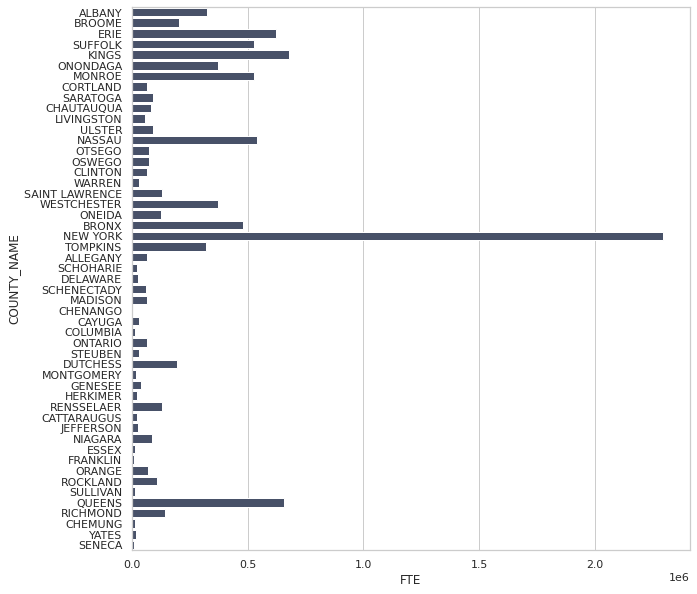

In [27]:
# total students (in full-time equivalents) per county

sns.set_theme(style='whitegrid')
plt.figure(figsize=(10,10))
ax1 = sns.barplot(x="FTE", y="COUNTY_NAME", ci=None, color="#404d70", saturation=.65, data=df1, estimator=np.sum)

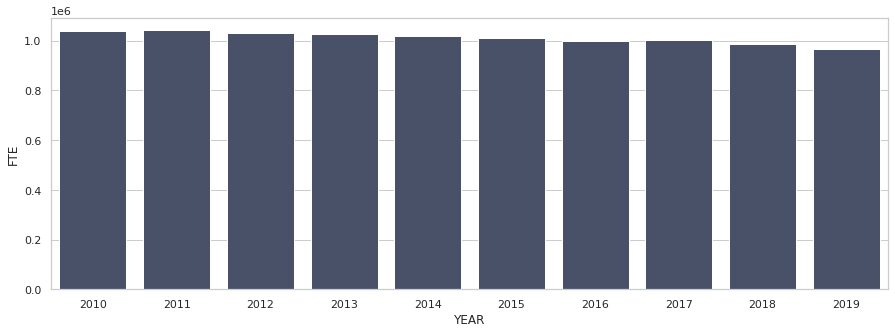

In [23]:
# total students (in full-time equivalents) per year

sns.set_theme(style='whitegrid')
plt.figure(figsize=(15,5))
ax1 = sns.barplot(x="YEAR", y="FTE", ci=None, color="#404d70", saturation=.65, data=df1, estimator=np.sum)

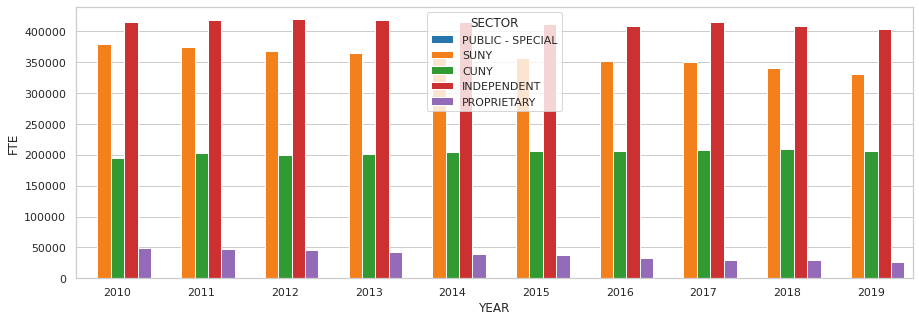

In [24]:
# total students (in full-time equivalents) per year and sector

sns.set_theme(style='whitegrid')
plt.figure(figsize=(15,5))
ax1 = sns.barplot(x="YEAR", y="FTE", ci=None, hue="SECTOR",  palette="tab10", saturation=.9, data=df1, estimator=np.sum)

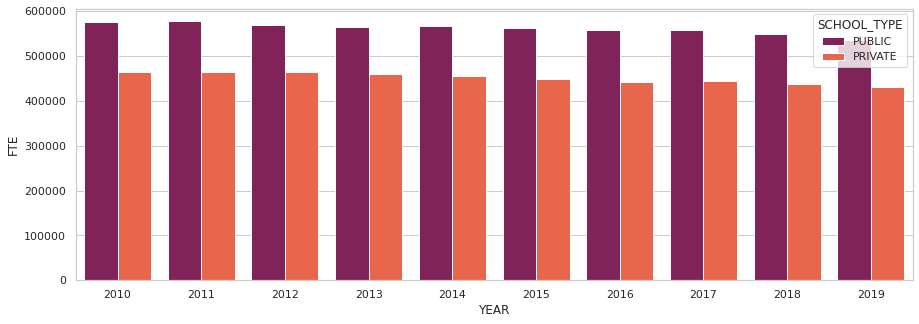

In [25]:
# total students (in full-time equivalents) per year and type of school

sns.set_theme(style='whitegrid')
plt.figure(figsize=(15,5))
ax1 = sns.barplot(x="YEAR", y="FTE", ci=None, hue="SCHOOL_TYPE", palette="rocket", saturation=.9, data=df1, estimator=np.sum)

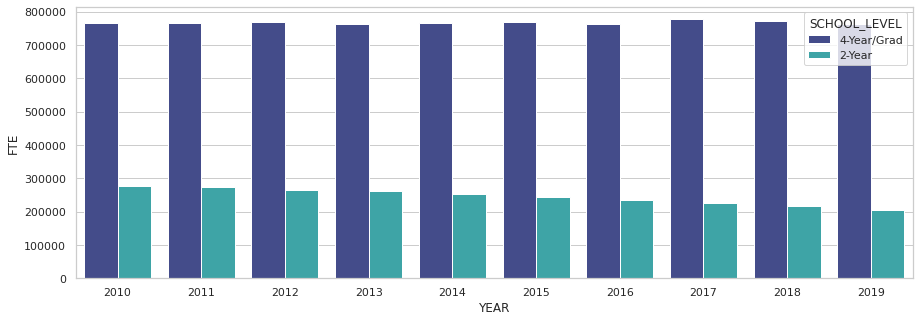

In [26]:
# total students (in full-time equivalents) per year and school level

sns.set_theme(style='whitegrid')
plt.figure(figsize=(15,5))
ax1 = sns.barplot(x="YEAR", y="FTE", ci=None, hue="SCHOOL_LEVEL",  palette="mako", saturation=.9, data=df1, estimator=np.sum)

## 5. Key Takeaways 

- **By County:**The counties where the most college students are enrolled are New York County, Kings County and Queens County 

- **By Year:** Overall enrollment has been lower since 2016 than it was during the first half of the decade

- **By Sector:** Independent schools account for the largest portion of college students in New York

- **By School Type:** A majority of New York's college students are enrolled in public institutions

- **By School Level:** Total enrollment in 2-year colleges is about %20 of total enrollment in 4-year colleges


# Next Steps

***Investigate the following:***

- Which individual schools account for the most enrollment?
- What contributed to the drop in enrollment in starting in 2016?
- Are the enrollment trends uniform across all counties? All sectors? All School types? 2-year vs. 4-year schools?
- What accounts for the outliers?